In supervised learning, when the model predicts continuous or real values based on a training dataset is called it is called as a Regression model. We will learn how to solve regression problems using boston housing dataset.
#### Boston Housing Dataset #####
In this dataset, each row describes a row or suburb of boston. Our objective is to predict the price of the house given columns that describe a house in boston. Let's load the data and explore.

In [7]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
####Exercise: Read Boston Data ####
boston = pd.read_csv("Data/boston.csv")

Explore Data!

In [4]:
####Exercise: Print the top 5 rows of data####

CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [ ]:
####Exercise: Print the column names####

Below is the description of information of columns:
<img src="img/datainfo.jpg">
What is the target variable?

In [5]:
####Create input and output####
X = boston.drop("MEDV",axis=1).values
y = boston["MEDV"].values
print(type(y))

### Simple Linear Regression ###
Predicting house value from a single feature.<br/>
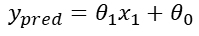
Line Equation: y=mx+c <br/>
Build a linear regression model to predict house value from average number of rooms per dwelling(RM)

In [9]:
avg_rooms = X[:,5]
print(type(avg_rooms))
y         = y.reshape(-1,1)
avg_rooms = avg_rooms.reshape(-1,1)

<class 'numpy.ndarray'>


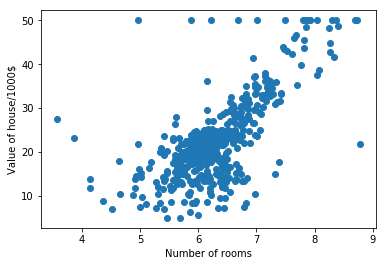

In [10]:
plt.scatter(avg_rooms,y)
plt.ylabel('Value of house/1000$')
plt.xlabel('Number of rooms')
plt.show()

#### Fitting a simple Regression Model ####

In [26]:
#Training a model#
from sklearn.linear_model import LinearRegression
lreg_mod1 = LinearRegression()
lreg_mod1.fit(avg_rooms,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Check the results by plotting

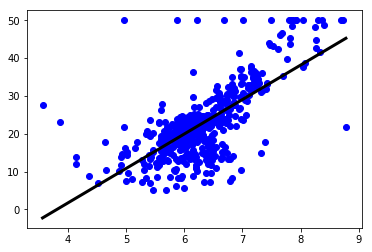

In [37]:
prediction_range = np.linspace(min(avg_rooms),max(avg_rooms)).reshape(-1,1)
y_pred           = lreg_mod1.predict(prediction_range)

plt.scatter(avg_rooms,y,color='blue')
plt.plot(prediction_space,y_pred,color='black',linewidth=3)
plt.show()

#### Exercise ####
Build a simple regression model to predict the house price using the nitrix oxides concentration (NOX)

In [30]:
#### Select the Input and output####
#### Write Your Code Below####

In [28]:
#### Do Bi-variate analysis of target variable and input(scatter plot)####
#### Write Your Code Below####

In [29]:
#### Fit/Train a regression model.The model should be named 'lreg_mod2' ####
#### Write Your Code Below ####

In [ ]:
#### Check the results by plotting ####
#### Write your code below ####

### Basics of Linear Regression ###
#### How did we get only those lines? ####
In linear regression we want to fit a line on the data. For simplicity consider line in 2 dimensions. Then the equation of the line can be written as 
#### y=mx+c ####
We rewrite this in the following forms:

<img src="img/line_eq.JPG">
where y is the target variable <br/>
x is the input(feature) <br/>
𝜃_0,𝜃_1 are the parameters we want to learn(find the slope and y intercept of the line) <br/>
But how do we find the values for 𝜃_0,𝜃_1? <br/>
We find that by defining an error function. We want the error to be as low as possible. So we will select that line(with slope 𝜃_0 and intercept 𝜃_1) which gives the minimum error. We also call error function as cost function/loss function.
#### Error Function ####
In linear regression we want to fit a line on the data.We want the line to stay close to as many data points as possible for accurate predictions. If the data points are very far, then there is a huge gap between the prediction and the actual, which is error. We call the error residuals, defined as <br/>
#### residuals = ∑ (y_actual- y_pred)
We can visualize residuals as the vertical distance between the actual and the predicted values.
<img src="img/residuals.JPG">

So, can we take the sum of these residuals as the error function? The answer's no. Because when you take the sum of residuals, the positive error cancels out the negative error. Thus, we take sum of the square of residuals as out cost function given by,<br/> 
<img src="img/cfun.JPG">
For whichever line, the cost function is low we will choose that as the best line.
We can also consider which linear regressionmodel is best by checking the above cost function.
Lets calculate the cost function for both of our models.

In [34]:
#### For model 1 ####
from sklearn.metrics import mean_squared_error 
y_pred = lreg_mod1.predict(avg_rooms)
print(mean_squared_error(y, y_pred) )

43.60055177116956


In [36]:
#### Exercise: Calculate mean square error for model2 ####
#### Write your code below ####

#### Multi variate Linear Regression ####
Here you fit a line in higher dimensions


Let's select all features and build the model

In [53]:
lreg_all.fit(X, y)
y_pred = lreg_all.predict(X)
print(mean_squared_error(y, y_pred))

21.894831181729206


#### Metric 2
R-squared is a statistical measure that’s used to assess the goodness of fit of our regression model.

In R-squared we have a baseline model which is the worst model. This baseline model doesn’t make use of any independent variables to predict the value of dependent variable Y. Instead it uses the mean of the observed responses of dependent variable Y and always predicts this mean as the value of Y.

Any regression model that we fit is compared to this baseline model to understand it’s goodness of fit.
In other words R-squared simply explains how good is your model when compared to the baseline model


<img src="img/r2.jpg">
<img src="img/adjusted_r2.JPG">

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42) 
lreg_all = LinearRegression() 
lreg_all.fit(X_train, y_train)
y_pred = lreg_all.predict(X_test)
print(mean_squared_error(y_test, y_pred))

21.51744423117723


In [41]:
#### Metric 2 : Rsquare ####
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred)

0.7112260057484929

In [52]:
#### Exercise: Calculate Rsquare for model1 and model2 and print it ####
#### Exercise: Calculate AdjustedRSquare for model1 and model2 and print it####

The mean squared error has decreased significantly!!

### Cross Validation ###
<img src="img/5fold.jpg">

In [50]:
from sklearn.model_selection import cross_val_score
lreg_all = LinearRegression() 
cv_results = cross_val_score(lreg_all, X, y, cv=5,scoring="r2")
print(cv_results)
np.mean(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


0.35327592439588124